In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score, precision_score, recall_score

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [25]:
data = pd.read_excel('excel/extract/2/铅钡.xlsx')
data.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),...,五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),量化风化,纹饰,颜色,类型,表面风化,总和
0,02,36.28,0.020016,1.050000,2.34,1.180000,5.73,1.860000,0.26,47.43,...,3.57,0.19,0.003644,0.028675,2,2,2,铅钡,风化,100.00
1,08,20.14,0.127769,0.007344,1.48,0.017329,1.34,0.013572,10.41,28.68,...,3.59,0.37,0.013985,2.580000,2,1,3,铅钡,风化,100.00
2,08严重风化点,4.61,1.257193,0.083635,3.19,0.162292,1.11,0.130625,3.14,32.45,...,7.56,0.53,0.126256,15.030000,2,1,3,铅钡,风化,100.00
3,11,33.59,0.888276,0.210000,3.51,0.710000,2.69,0.123667,4.93,25.39,...,9.38,0.37,0.077115,0.910942,2,1,2,铅钡,风化,97.39
4,19,29.64,0.374655,0.053430,2.93,0.590000,3.57,1.330000,3.51,42.82,...,8.83,0.19,0.055317,0.756598,2,2,2,铅钡,风化,100.00


In [26]:
x = data.loc[:, '二氧化硅(SiO2)':'量化风化']
print(x.shape)
scaler = StandardScaler()
x = scaler.fit_transform(x)

(49, 15)


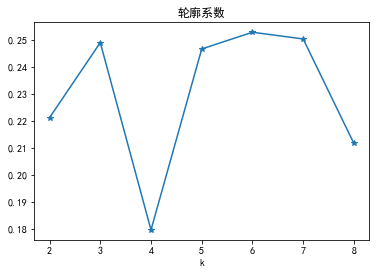

In [27]:
#肘部法
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
inertia=[]
si1_score=[]
for k in range(2,9) :
    kmeans=KMeans(n_clusters=k, random_state=0).fit(x)
    inertia.append(np.sqrt(kmeans.inertia_))
    si1_score.append(silhouette_score(x,kmeans.labels_))
plt.plot(range(2,9) , si1_score, '*-')
plt.xlabel('k')
plt.title('轮廓系数')
plt.savefig('./excel/result/2/轮廓系数_铅钡.png')
plt.show()

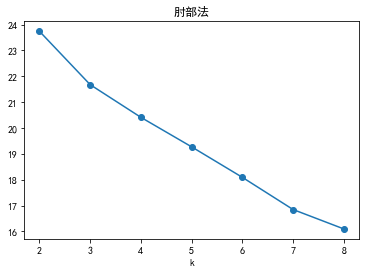

In [28]:
plt.plot(range(2,9) , inertia, 'o-')
plt.xlabel('k')
plt.title('肘部法')
plt.savefig('./excel/result/2/肘部法_铅钡.png')
plt.show()


In [29]:
model = KMeans(n_clusters=4, max_iter=100, init="k-means++",random_state=20)
model.fit(x)

KMeans(max_iter=100, n_clusters=4, random_state=20)

c:\Miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Miniconda\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


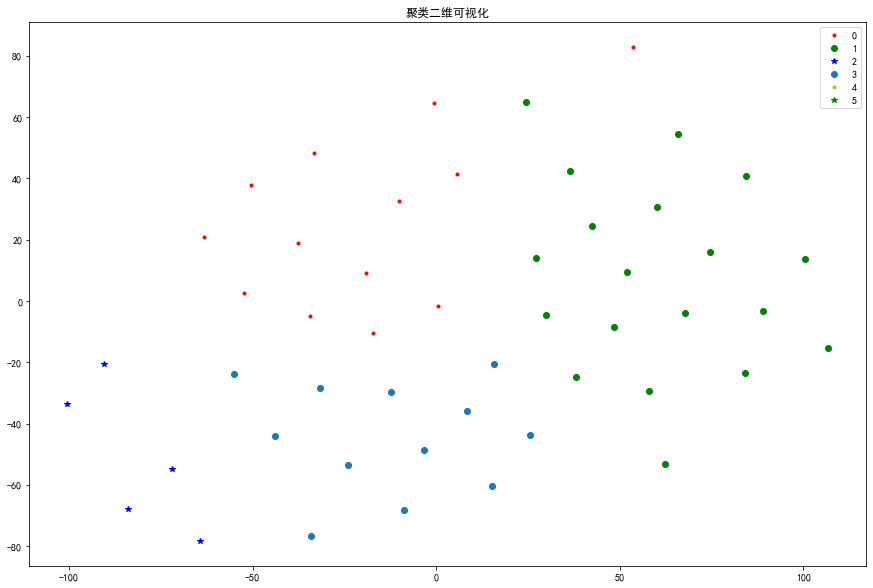

In [32]:
from sklearn.manifold import TSNE


t_sne = TSNE()
t_sne.fit(x)
t_sne = pd.DataFrame(t_sne.embedding_, index=data.index)

r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['聚类类别']
r.to_excel('./excel/result/2/k-means_铅钡.xlsx')
plt.figure(figsize=(15,10))

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


dd = t_sne[r[u'聚类类别'] == 0]
plt.plot(dd[0], dd[1], 'r.',label=0)
dd = t_sne[r[u'聚类类别'] == 1]
plt.plot(dd[0], dd[1], 'go',label=1)
dd = t_sne[r[u'聚类类别'] == 2]
plt.plot(dd[0], dd[1], 'b*',label=2)
dd = t_sne[r[u'聚类类别'] == 3]
plt.plot(dd[0], dd[1], 'o',label=3)

dd = t_sne[r[u'聚类类别'] == 4]
plt.plot(dd[0], dd[1], 'y.',label=4)
dd = t_sne[r[u'聚类类别'] == 5]
plt.plot(dd[0], dd[1], 'g*',label=5)
plt.title('聚类二维可视化')
plt.legend()

plt.savefig('./excel/result/2/k-means_铅钡.png')
plt.show()